In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.spatial import Voronoi, voronoi_plot_2d

## Création d'une liste de points au hasard 

In [2]:
long=80
haut=40
distance=60
largeur=27
dens_min=1
dens_max=5


In [3]:
def Dfield(x,y):
    val=0
    if (np.abs(x)<=distance/2):
        
        val+=np.abs(y)*(long/2-np.abs(x))/(long/2*haut/2)
    val=val*(dens_max-dens_min)+dens_min
    return val

In [4]:
Dfield(20,20)

3.0

Visualisation of density function

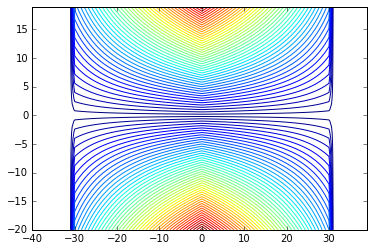

In [5]:
dx=1
x = np.arange(-long/2, long/2, dx)
y = np.arange(-haut/2,haut/2, dx)
xx, yy = np.meshgrid(x, y, sparse=False) # MESHGRID 2D plot
Ny,Nx=xx.shape
z=np.zeros([Ny,Nx])
for i in range(Nx):
    for j in range(Ny):
        #print(x[i],y[j])
        getF=Dfield(x[i],y[j])
        z[j,i]=getF # compute each B value as rr function
        #print('xyF = ',x[i],y[j],z[j,i])
        
%matplotlib inline
plt.figure()
plt.hold(True)
plt.contour(xx,yy,z,50)


In [6]:
def pointsMaille(nb=100):
    '''use DField function to initiate probability calculation'''
    n=0
    np.random.seed(seed=1234)
    xy=np.zeros([nb,2])
    
    while (n<nb):
        x,y,v=np.random.rand(3) #
        x=(x-0.5)*2*long
        y=(y-0.5)*2*haut
        #print(xy,x,y,v)
        df=(Dfield(x,y)/dens_max)
        if (v<df): # validate
            #print(v,df)
            xy[n,0]=x
            xy[n,1]=y
            n=n+1
            
    return xy
            
        

Create initial point density accord to dField mapping

/home/chiaruttini/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


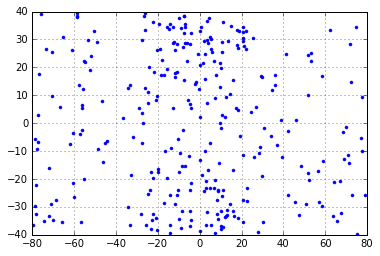

In [7]:
xy=pointsMaille(nb=3e2)
%matplotlib inline
plt.figure()
plt.hold(True)
plt.grid(True)
plt.plot(xy[:,0],xy[:,1],'.')


VOronoi

In [9]:
vor= Voronoi(xy)

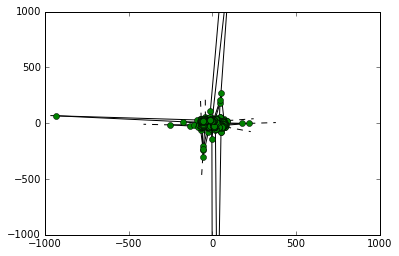

In [10]:
%matplotlib inline
voronoi_plot_2d(vor)
plt.xlim([-1e3,1e3])
plt.ylim([-1e3,1e3])
plt.show()

(877, 4)


(-20.0, 20.0)

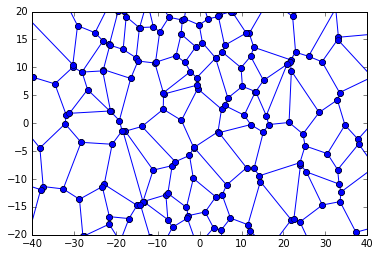

In [11]:
vert=vor.vertices
vert
ridge=vor.ridge_vertices
ridge=np.array(ridge)
ll=[]
for k in range(ridge.shape[0]): # for all ridges
    a,b=ridge[k,:]
    if (a>=0)&(b>=0):
        x1,y1=vert[a,:]
        x2,y2=vert[b,:]
        
       # if (np.min([x1,x2])>-long/2)&(np.max([x1,x2])<long/2) \
       # &(np.min([y1,y2])>-haut/2)&(np.max([y1,y2])<haut/2):
        ll.append([x1,y1,x2,y2])
            #print(x1,y1,x2,y2)
ll=np.array(ll) # array conversion
print(ll.shape)
%matplotlib inline
plt.figure(1)
plt.hold(True)
for kk in range(ll.shape[0]):
    plt.plot([ll[kk,0], ll[kk,2]],[ll[kk,1], ll[kk,3]],'o-b' )

plt.xlim([-long/2,long/2])
plt.ylim([-haut/2,haut/2])
    

##### vert.shape

In [12]:
np.savetxt('data1.txt',ll,delimiter=',',fmt='%.8e')

In [13]:
def createScadInclude(nf,points):
    N=points.shape[0] #number of points
    print(points.shape)
    f=open(nf,'w')
    f.write('a = [')
    for k in range(N):
        #print(k)
        if (k>0):
            f.write(',')
        x1,y1,x2,y2=points[k,:]
        txt="{:10.4f}".format(x1)
        txt+=',' +"{:10.4f}".format(y1)
        txt+=',' +"{:10.4f}".format(x2)
        txt+=',' +"{:10.4f}".format(y2)
        f.write('['+txt+']')
    f.write('];\n')
    f.close()
        

In [15]:
createScadInclude('include2.scad',ll)

(877, 4)


Formattage in openscad Way!!
x=[[2,3,4],[5,6,7]];
echo(x[0][1]);
